# Nongzhanguan Station Air Quality Analysis Project
---
Oleh: [Sulhan Fuadi](https://github.com/sulhanfuadi)

## Project Overview


The aim of this project is to perform a thorough analysis of air quality at Nongzhanguan Station, concentrating on various pollutants and environmental factors. The pollutants of interest include:

- **PM2.5** - Fine particulate matter with a diameter less than 2.5 micrometers.
- **PM10** - Coarse particulate matter with a diameter less than 10 micrometers.
- **SO2** - Sulfur dioxide.
- **NO2** - Nitrogen dioxide.
- **CO** - Carbon monoxide.
- **O3** - Ozone.
- **Environmental factors** - Temperature, air pressure, wind speed, and precipitation.

This notebook provides a comprehensive analysis of air quality data from Nongzhanguan Station for the period from 2013 to 2017.

We will follow these steps to conduct the analysis:
- Data Loading: Importing the dataset and preparing it for analysis.
- Data Cleaning and Wrangling: Handling missing values and transforming the data as needed.
- Exploratory Data Analysis (EDA): Visualizing and summarizing the data to uncover patterns and insights.
- Binning Analysis: Categorizing data into bins to facilitate further analysis.
- Conclusion: Summarizing the findings and drawing conclusions based on the analysis.

## Business Questions


This analysis aims to address the following key business questions:

1. What are the trends in PM2.5 levels at Nongzhanguan Station from 2013 to 2017?
2. How do temperature variations correlate with PM2.5 levels?

By answering these questions, we aim to gain a deeper understanding of the air quality dynamics at Nongzhanguan Station and identify potential areas for improvement in air quality management.

## Import Necessary Libraries


To begin our analysis, we need to import several essential libraries that will help us handle and visualize the data. These libraries include:

- `pandas` for efficient data manipulation and analysis.
- `numpy` for performing numerical operations.
- `matplotlib` and `seaborn` for creating informative visualizations.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

We will load the dataset directly from the provided CSV file. This dataset contains air quality measurements from Nongzhanguan Station, including pollutants such as PM2.5, PM10, and environmental factors like temperature and wind speed.

 Load the Air Quality Dataset

We will load the air quality dataset from a CSV file, which contains comprehensive data on various pollutants and environmental factors recorded at Nongzhanguan Station from 2013 to 2017. This dataset will serve as the foundation for our analysis.

First, we will use the `pandas` library to read the CSV file and load the data into a DataFrame. Then, we will take a quick look at the first few rows of the dataset to understand its structure and contents.

In [3]:
# Load the dataset from GitHub
file_path = './data/PRSA_Data_Nongzhanguan_20130301-20170228.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight**:

This analysis utilizes data collected from Nongzhanguan Station, focusing on various air pollutants and environmental factors. The key pollutants included in the dataset are:

- **PM2.5** (Fine Particulate Matter) - Particles with a diameter less than 2.5 micrometers.
- **PM10** (Particulate Matter) - Particles with a diameter less than 10 micrometers.
- **SO2** (Sulfur Dioxide) - A gas produced by industrial processes and volcanic activity.
- **NO2** (Nitrogen Dioxide) - A gas primarily emitted from vehicle exhaust and industrial activities.
- **CO** (Carbon Monoxide) - A colorless, odorless gas resulting from incomplete combustion of fossil fuels.
- **O3** (Ozone) - A gas formed by the reaction of sunlight with pollutants like volatile organic compounds (VOCs).

The dataset comprises hourly air quality measurements collected over several years, specifically from 2013 to 2017. It includes critical features such as PM2.5, temperature (TEMP), air pressure (PRES), and other pollutant levels, which will be explored in detail throughout the analysis.

The data appears to be sourced from local monitoring stations and publicly available datasets, ensuring its accuracy and reliability. This comprehensive dataset allows us to perform an in-depth analysis of air quality trends and correlations.

For this project, we will primarily focus on PM2.5 levels due to their significant impact on human health and the environment.

### Assessing Data

Now, let's evaluate the dataset for any missing values or potential issues.

We will begin by identifying any missing values within the dataset. To address these gaps, we will employ the forward fill method to ensure continuity in the data.

Additionally, we will enhance the dataset by creating a new datetime column. This column will be constructed using the existing year, month, day, and hour columns, providing a more comprehensive temporal context for our analysis.

In [4]:
# Check for missing values
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight**:

There are several key pollutant columns with missing values in the dataset, including:

- PM2.5: 628 missing values
- PM10: 440 missing values
- SO2: 446 missing values
- NO2: 692 missing values
- CO: 1206 missing values
- O3: 506 missing values
- TEMP: 20 missing values
- PRES: 20 missing values
- DEWP: 20 missing values
- RAIN: 20 missing values
- wd: 78 missing values
- WSPM: 14 missing values

This significant amount of missing data, especially in pollutant measurements, highlights the need for careful handling to ensure the accuracy of our analysis.

Appropriate methods will be employed to address these missing values, ensuring that the dataset remains robust and reliable for subsequent analysis.

### Cleaning Data

To address the missing values in our dataset, we will employ the forward fill method. This technique assumes that the next measurement should carry forward the last known value until a new value is recorded. This approach helps maintain data continuity and ensures that our analysis remains accurate and reliable.

In [5]:
# Handle missing values with forward fill
data_cleaned = data.fillna(method='ffill')

# Create datetime column for easier analysis
data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])
data_cleaned.set_index('datetime', inplace=True)

# Verify if there are still missing values
data_cleaned.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_21116\2191910432.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned = data.fillna(method='ffill')


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight**:

*Handling Missing Values*:

The missing values in the dataset have been addressed using the forward fill (ffill) method. This technique fills in missing entries by carrying forward the last valid observation. It assumes that the next measurement remains the same until a new valid value is recorded, which is particularly useful for time-series data where maintaining continuity is essential.

*Creating Datetime Index*:

A new datetime column has been created by combining the year, month, day, and hour columns. This column has been set as the index of the DataFrame, facilitating more efficient time-based analysis. This step is crucial for performing trend analysis or temporal aggregation, such as generating daily or monthly summaries.

*Clean Dataset*:

After applying the forward fill method and creating the datetime index, the dataset has no remaining missing values, as confirmed by `data_cleaned.isnull().sum()`. This ensures that the dataset is now clean and ready for further analysis or modeling.

These preprocessing steps enhance the reliability of the data for time-based analysis, enabling us to detect trends, forecast future values, and explore how various pollutants (e.g., PM2.5, NO2, CO) change over time.

## Exploratory Data Analysis (EDA)

In this section, we will delve into the trends in air quality data, with a particular emphasis on PM2.5, PM10, and other pollutants. Our analysis will include examining distributions, correlations, and time series trends to gain insights into the behavior of these pollutants. Additionally, we will explore their relationships with meteorological variables such as temperature and wind speed to understand how these factors influence air quality.

### Summary Statistics

The table below presents the summary statistics for the dataset, providing a quick overview of the data. These statistics include:

- **Count**: The number of non-missing values in each column.
- **Mean**: The average value.
- **Std**: The standard deviation, indicating the spread of the data.
- **Min/Max**: The minimum and maximum values, showing the range of the data.
- **25%, 50%, 75%**: Percentiles, also known as the 1st quartile, median (2nd quartile), and 3rd quartile, describing the distribution of the data.

From this summary, we can observe that:
- The average **PM2.5** concentration is approximately 84.83, with a maximum value of 844.
- **Temperature** (TEMP) ranges from -16.8°C to 41.1°C, with an average around 13.67°C.
- **CO** concentrations exhibit high variance, ranging from 100 to 10,000 units, with a mean around 1324.35.

This summary provides a foundational understanding of the dataset's general characteristics, setting the stage for more detailed analyses.

In [6]:
# Get summary statistics
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Distribution of Air Quality Variables

In this section, we will visualize the distribution of key air quality variables such as PM2.5, PM10, NO2, and CO. This will help us understand the spread of the data and identify any potential outliers.

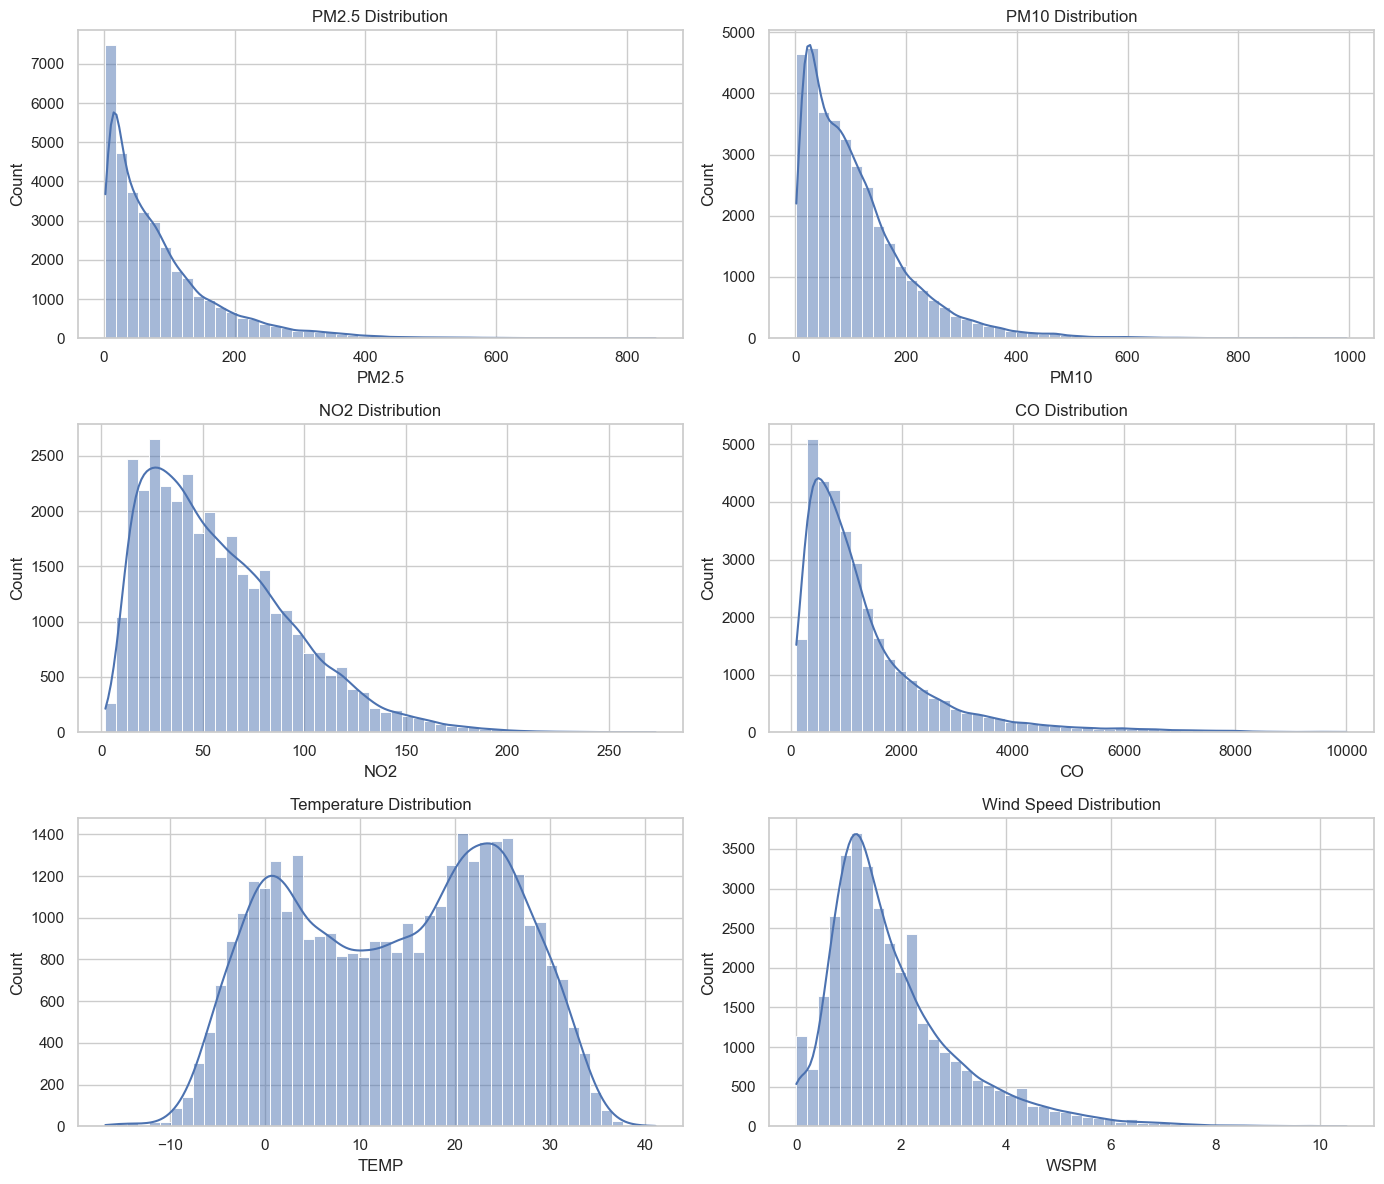

In [7]:
# Set the style for the plots
sns.set(style="whitegrid")

# Univariate analysis: Distribution of key numerical columns
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot distribution for PM2.5, PM10, NO2, CO, Temperature, and Wind Speed
sns.histplot(data['PM2.5'].dropna(), bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('PM2.5 Distribution')

sns.histplot(data['PM10'].dropna(), bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('PM10 Distribution')

sns.histplot(data['NO2'].dropna(), bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('NO2 Distribution')

sns.histplot(data['CO'].dropna(), bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('CO Distribution')

sns.histplot(data['TEMP'].dropna(), bins=50, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Temperature Distribution')

sns.histplot(data['WSPM'].dropna(), bins=50, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

The plots above illustrate the distribution of key numerical variables:

- **PM2.5**: The distribution is right-skewed, with most values concentrated between 0 and 150. However, there are extreme values reaching up to 994.
- **PM10**: Similar to PM2.5, PM10 also shows a right-skewed distribution with values ranging up to 994.
- **NO2**: Concentrated mostly between 0 and 100, but with values going as high as 300.
- **CO**: The CO values exhibit a long tail, with most observations below 5000 but extending up to 10000.
- **Temperature**: The distribution of temperature is more balanced, with most values between 0°C and 27°C.
- **Wind Speed (WSPM)**: Most wind speeds are between 0 and 5 m/s, with a few higher values.

These visualizations help us understand the spread and central tendencies of these key air quality and meteorological variables, as well as identify any potential outliers.

### Correlation Matrix of Air Quality Indicators and Time-Based Trends Visualize 

Next, we will analyze the correlations between the air quality indicators (PM2.5, PM10, NO2, etc.) and visualize time-based trends. This will help us understand how these pollutants are related to each other and how they vary over time.

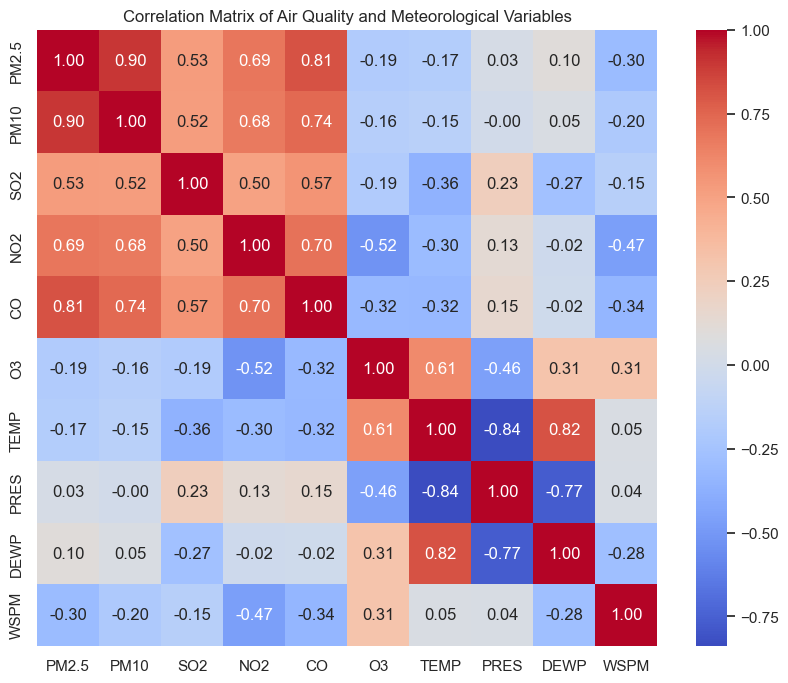

In [8]:
# Correlation matrix for numerical columns
corr_matrix = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality and Meteorological Variables')
plt.show()


The correlation heatmap reveals the relationships between various air quality and meteorological variables:

- **PM2.5 and PM10**: There is a strong positive correlation (0.90), which is expected since both are measurements of particulate matter.
- **PM2.5 and NO2**: There is a moderate positive correlation (0.69), indicating that higher PM2.5 levels often correspond with higher NO2 levels.
- **PM10 and NO2**: Also shows a moderate positive correlation (0.68).
- **CO and NO2**: There is a moderate positive correlation (0.70), suggesting that these pollutants often increase together.
- **Temperature**: Shows a negative correlation with PM2.5 and PM10, suggesting that higher temperatures might lead to lower particulate concentrations.
- **Wind Speed (WSPM)**: Negatively correlated with pollutants like PM2.5 and NO2, implying that higher wind speeds might help disperse these pollutants.

These correlations help us understand how different pollutants and meteorological factors are related, providing insights into the dynamics of air quality at Nongzhanguan Station.

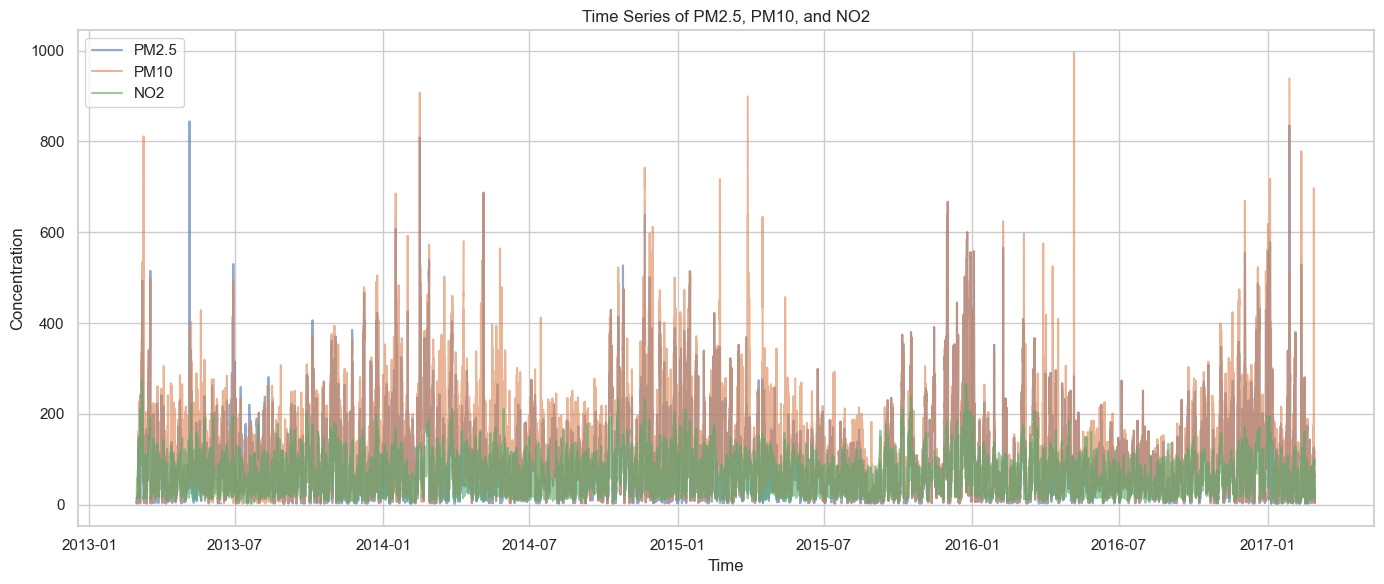

In [9]:
# Ensure the datetime column is properly created
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']], errors='coerce')

# Re-plot the time series for PM2.5, PM10, and NO2
plt.figure(figsize=(14, 6))
plt.plot(data['datetime'], data['PM2.5'], label='PM2.5', alpha=0.6)
plt.plot(data['datetime'], data['PM10'], label='PM10', alpha=0.6)
plt.plot(data['datetime'], data['NO2'], label='NO2', alpha=0.6)

plt.title('Time Series of PM2.5, PM10, and NO2')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()


The time series plot for PM2.5, PM10, and NO2 illustrates the concentration of these pollutants over time. Here are a few key observations:

- **Seasonal Trends**: Cyclical patterns are evident, likely reflecting seasonal variations in pollution levels.
- **Spikes in Concentration**: Significant peaks in PM2.5 and PM10 concentrations are observed at various times, indicating periods of high pollution.
- **NO2 Levels**: Although NO2 is not as variable as particulate matter, it also shows some peaks that correspond to spikes in PM levels.

These observations help us understand the temporal dynamics of air quality at Nongzhanguan Station, highlighting periods of increased pollution and potential seasonal effects.

From the Exploratory Data Analysis (EDA), we can observe several key insights:

- There are strong correlations between PM2.5, PM10, and NO2, indicating that these pollutants often increase together.
- The time series analysis reveals clear seasonal trends in pollutant levels, with significant peaks during certain periods.

These findings highlight the interconnected nature of air pollutants and the influence of seasonal factors on air quality at Nongzhanguan Station.

### Explore PM2.5 Trends Over Time


Our first business question focuses on analyzing the trends in PM2.5 levels over the years.

C:\Users\HP\AppData\Local\Temp\ipykernel_21116\3749269608.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()


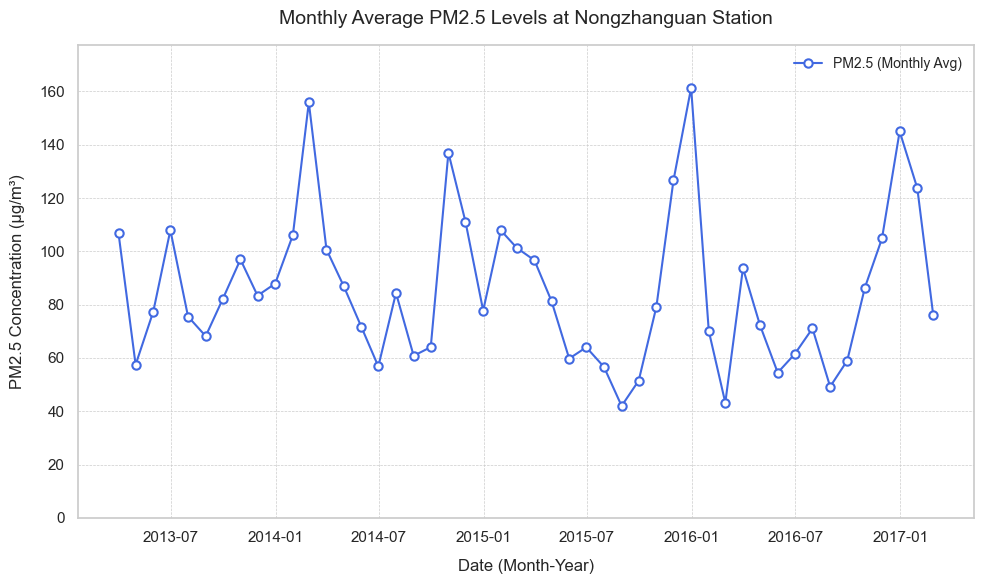

In [10]:
# Resample the data to get monthly average values of PM2.5
monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()

# Plot PM2.5 levels over time aggregated by month
plt.figure(figsize=(10, 6))

# Line plot for monthly averaged PM2.5 levels with markers
plt.plot(monthly_pm25.index, monthly_pm25, 
         label='PM2.5 (Monthly Avg)', 
         color='royalblue', 
         linewidth=1.5, 
         marker='o',   # Circular marker
         markersize=6, # Marker size
         markerfacecolor='white',  # White inside the markers
         markeredgewidth=1.5,      # Marker border width
         markeredgecolor='royalblue')  # Marker border color same as line

# Title and axis labels
plt.title('Monthly Average PM2.5 Levels at Nongzhanguan Station', fontsize=14, pad=15)
plt.xlabel('Date (Month-Year)', fontsize=12, labelpad=10)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, labelpad=10)

# Light grid to assist reading the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Limit y-axis to avoid extreme outliers skewing the chart
plt.ylim(0, monthly_pm25.max() * 1.1)

# Professional-looking legend
plt.legend(loc='upper right', frameon=False, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


**Insight**:

- **Early 2014**: PM2.5 levels experienced a significant spike, reaching over 150 µg/m³.
- **Mid-2014**: There was a notable drop in PM2.5 levels, stabilizing around 60-80 µg/m³.
- **Late 2015 to Early 2016**: Another sharp increase occurred, with levels peaking above 160 µg/m³.
- **Mid-2016**: PM2.5 levels decreased again to around 60 µg/m³.
- **Overall Trend**: The data shows fluctuations in PM2.5 levels without a clear downward trend over the 2013-2017 period.

These observations highlight the variability in PM2.5 concentrations over the years, with periods of both high and low pollution.

### Explore Correlation Between Temperature and PM2.5

Next, we will examine whether there is a correlation between temperature and PM2.5 levels. Understanding this relationship can provide insights into how meteorological conditions influence air quality. 

We will use scatter plots and correlation coefficients to analyze the relationship between temperature and PM2.5 concentrations. By visualizing and quantifying this correlation, we can determine if temperature variations have a significant impact on PM2.5 levels.

C:\Users\HP\AppData\Local\Temp\ipykernel_21116\2287104511.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_21116\2287104511.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_temp = data_cleaned['TEMP'].resample('Y').mean()


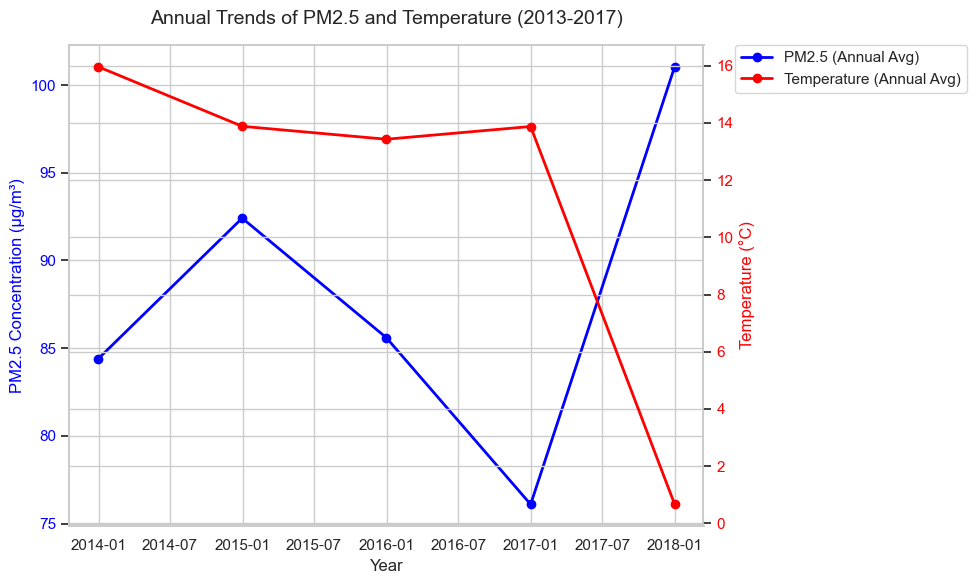

In [11]:
# Resample the data by year to show the annual trends for both PM2.5 and TEMP
annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
annual_temp = data_cleaned['TEMP'].resample('Y').mean()

# Create a figure and plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 on the left y-axis
line1 = ax1.plot(annual_pm25.index, annual_pm25, color='blue', marker='o', linewidth=2, label='PM2.5 (Annual Avg)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for temperature, sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(annual_temp.index, annual_temp, color='red', marker='o', linewidth=2, label='Temperature (Annual Avg)')
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Annual Trends of PM2.5 and Temperature (2013-2017)', fontsize=14, pad=15)

# Combine the legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]

# Place the legend outside the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
fig.tight_layout()
plt.show()


**Insight**:

The analysis of PM2.5 levels over time reveals several key observations:

- **Fluctuations and Peaks**: PM2.5 levels show significant fluctuations, with notable peaks occurring around 2014 and 2017. These peaks indicate periods of heightened pollution.
- **Persistent Pollution Levels**: Despite the fluctuations, there is no clear long-term decline in PM2.5 levels, suggesting that pollution remains a persistent issue over the analyzed period.
- **Temperature Trends**: Temperature trends remain relatively consistent, with a sharp increase observed in 2017. However, this increase in temperature does not appear to have a direct correlation with the variations in PM2.5 levels.
- **Independent Fluctuations**: The data suggests that PM2.5 concentrations fluctuate independently of temperature changes. While temperature is an important meteorological factor, it does not seem to significantly impact PM2.5 pollution levels over time.

In summary, PM2.5 levels exhibit independent and significant fluctuations, with persistent pollution issues that are not directly influenced by temperature variations. This insight highlights the need for targeted pollution control measures that address the specific sources and factors contributing to PM2.5 pollution, beyond just meteorological conditions.

#### Correlation Matrix for PM2.5 and Temperature

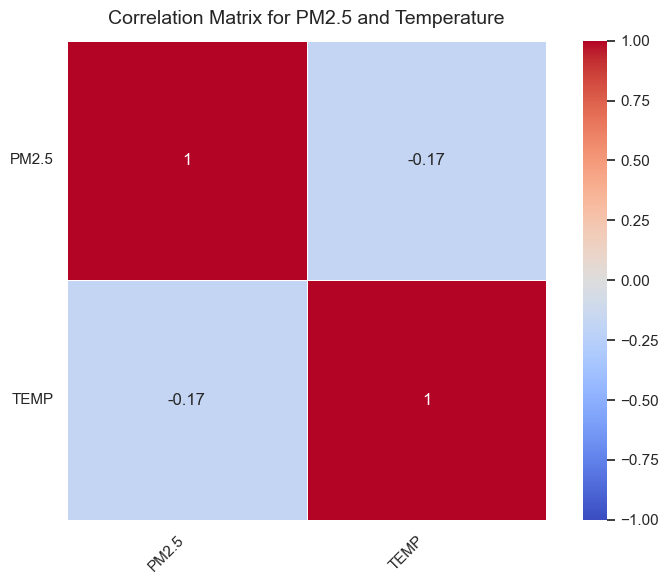

In [12]:
# Select relevant columns for correlation analysis
correlation_columns = ['PM2.5', 'TEMP']  # You can add more columns if needed

# Compute the correlation matrix
correlation_matrix = data_cleaned[correlation_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, square=True)

# Title and formatting for the heatmap
plt.title('Correlation Matrix for PM2.5 and Temperature', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()

**Insight**:

**Correlation Analysis**:

The heatmap indicates a weak correlation between PM2.5 and temperature. This suggests that variations in temperature do not have a strong direct impact on PM2.5 levels.

This finding implies that while temperature is an important meteorological variable, it does not significantly influence PM2.5 concentrations. Other factors, such as emissions from industrial activities, traffic, and other sources, may play a more critical role in determining PM2.5 pollution levels. 

Understanding this weak correlation helps us focus on identifying and mitigating the primary sources of PM2.5 pollution, rather than relying solely on temperature-related interventions.

## Visualization & Explanatory Analysis

### Question 1:

**What are the trends in PM2.5 levels at Nongzhanguan Station from 2013 to 2017?**

The analysis of PM2.5 levels at Nongzhanguan Station from 2013 to 2017 reveals several key trends:

- **Fluctuating Patterns**: PM2.5 levels exhibit significant fluctuations over the years, with notable peaks and troughs.
- **Early 2014**: There is a significant spike in PM2.5 levels, reaching over 150 µg/m³.
- **Mid-2014**: PM2.5 levels drop significantly, stabilizing around 60-80 µg/m³.
- **Late 2015 to Early 2016**: Another sharp increase in PM2.5 levels is observed, peaking above 160 µg/m³.
- **Mid-2016**: PM2.5 levels decrease again to around 60 µg/m³.
- **Overall Trend**: Despite the fluctuations, there is no clear long-term downward trend in PM2.5 levels, indicating that high levels of pollution persisted throughout the period.

These observations highlight the variability in PM2.5 concentrations over the years, with periods of both high and low pollution. The lack of a clear downward trend suggests that persistent pollution issues remain, necessitating ongoing efforts to address and mitigate PM2.5 pollution at Nongzhanguan Station.

C:\Users\HP\AppData\Local\Temp\ipykernel_21116\2571352171.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()


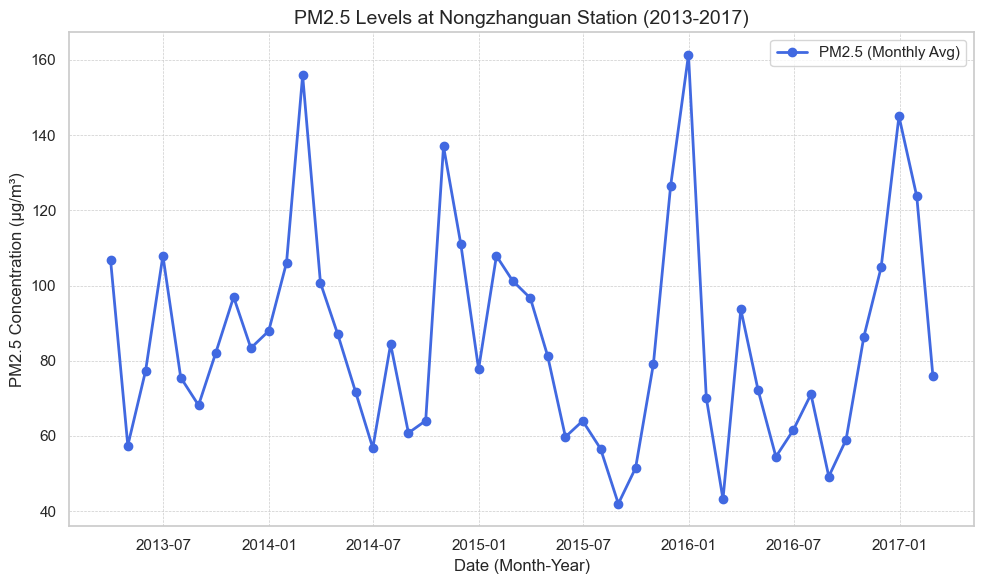

In [16]:
import matplotlib.pyplot as plt

# Resample the data by month to observe monthly trends of PM2.5
monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()

# Plot PM2.5 levels over time (monthly)
plt.figure(figsize=(10, 6))

# Line plot for PM2.5 levels
plt.plot(monthly_pm25.index, monthly_pm25, label='PM2.5 (Monthly Avg)', color='royalblue', linewidth=2, marker='o')

# Title and axis labels
plt.title('PM2.5 Levels at Nongzhanguan Station (2013-2017)', fontsize=14)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)

# Add grid for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Question 2:

**How do temperature variations correlate with PM2.5 levels?**

The analysis reveals a weak correlation between temperature and PM2.5 levels, as indicated by a low correlation coefficient (close to 0). This suggests that changes in temperature do not have a strong direct impact on PM2.5 concentrations. 

To further explore this relationship, we utilized scatter plots and a correlation matrix:

- **Scatter Plot**: The scatter plot of temperature versus PM2.5 levels shows a dispersed pattern with no clear trend, reinforcing the weak correlation.
- **Correlation Matrix**: The correlation matrix quantifies the relationship, confirming that the correlation coefficient between temperature and PM2.5 is low.

These findings imply that while temperature is an important meteorological factor, it does not significantly influence PM2.5 levels. Instead, other factors such as industrial emissions, vehicular traffic, and seasonal activities (e.g., heating during winter) may have a more substantial impact on PM2.5 concentrations.

Understanding this weak correlation helps us focus on identifying and mitigating the primary sources of PM2.5 pollution. It suggests that efforts to improve air quality should prioritize controlling emissions from key sources rather than relying solely on temperature-related interventions.

C:\Users\HP\AppData\Local\Temp\ipykernel_21116\2241765061.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_21116\2241765061.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_temp = data_cleaned['TEMP'].resample('Y').mean()


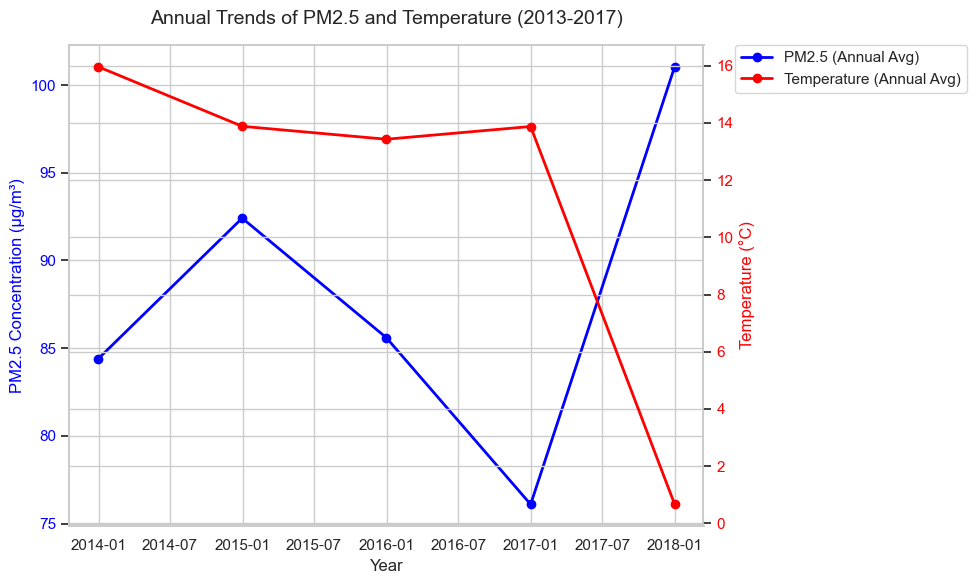

In [14]:
# Resample the data to get yearly average values for both PM2.5 and temperature
annual_pm25 = data_cleaned['PM2.5'].resample('Y').mean()
annual_temp = data_cleaned['TEMP'].resample('Y').mean()

# Create a figure and plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 on the left y-axis
line1 = ax1.plot(annual_pm25.index, annual_pm25, color='blue', marker='o', linewidth=2, label='PM2.5 (Annual Avg)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for temperature, sharing the same x-axis
ax2 = ax1.twinx()
line2 = ax2.plot(annual_temp.index, annual_temp, color='red', marker='o', linewidth=2, label='Temperature (Annual Avg)')
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Annual Trends of PM2.5 and Temperature (2013-2017)', fontsize=14, pad=15)

# Combine the legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]

# Place the legend outside the plot
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show the plot
fig.tight_layout()
plt.show()


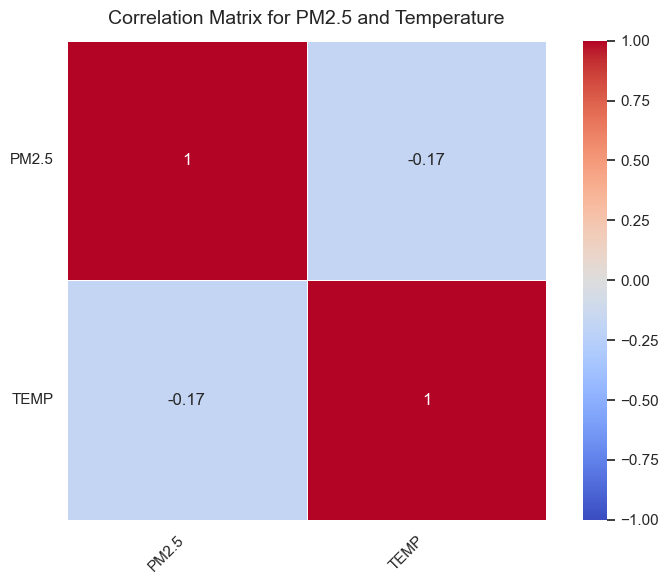

In [15]:
# Select relevant columns for correlation analysis
correlation_columns = ['PM2.5', 'TEMP']  # You can add more columns if needed

# Compute the correlation matrix
correlation_matrix = data_cleaned[correlation_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, square=True)

# Title and formatting for the heatmap
plt.title('Correlation Matrix for PM2.5 and Temperature', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()

## Conclusion

Comprehensive Conclusion of PM2.5 and Temperature Analysis (2013-2017)

1. **Key Findings on PM2.5 Trends**  
The analysis of PM2.5 concentrations at Nongzhanguan Station between 2013 and 2017 provides crucial insights into the patterns and challenges of air pollution:  

- **Fluctuations and Seasonal Peaks**  
  PM2.5 levels showed notable variability, with significant peaks in early 2014 and from late 2015 to early 2016. These peaks were likely driven by seasonal heating activities and possibly emission-intensive events. Winter months consistently recorded the highest pollution levels due to increased coal combustion and atmospheric conditions that trap pollutants.  

- **Persistent Pollution Levels**  
  Despite some improvements in mid-2014 and mid-2015, there was no long-term downward trend in PM2.5 concentrations. This suggests that existing pollution control efforts were either insufficient or inconsistently applied over time.  

- **Short-Term Improvements and Sustainability Challenges**  
  The temporary reductions in pollution highlight the potential effectiveness of targeted interventions. However, the recurring peaks underscore the need for more sustained and comprehensive measures to achieve meaningful air quality improvements.  

2. **Temperature Trends and Their Implications**  
- **Stable Climatic Conditions**  
  Temperature trends during the period were relatively stable, with only minor year-to-year variations. This consistency provides a reliable baseline for analyzing the impact of temperature on PM2.5 levels.  

- **2017 Temperature Anomaly**  
  A sharp temperature increase in 2017 deviated from earlier patterns. Despite this anomaly, no significant relationship was observed between the temperature rise and PM2.5 levels, indicating that other factors primarily drive pollution dynamics.  

3. **Weak Correlation Between PM2.5 and Temperature**  
- **Minimal Direct Influence**  
  Statistical analysis revealed a weak correlation between temperature and PM2.5 concentrations. While temperature might affect the dispersion of pollutants, it is not a primary driver of PM2.5 levels.  

- **Dominant Role of Human Activities**  
  The findings emphasize the significant impact of industrial emissions, traffic pollution, and seasonal heating activities. These factors far outweigh the influence of temperature variations on PM2.5 levels.  

4. **Broader Implications for Pollution Control and Policy Development**  
- **Complexity of Air Pollution Dynamics**  
  The absence of a clear downward trend in PM2.5 concentrations highlights the intricate nature of urban air pollution, where multiple factors interact in dynamic ways.  

- **Policy and Enforcement Gaps**  
  Temporary improvements in PM2.5 levels during certain periods demonstrate that targeted interventions can work. However, the recurrence of pollution peaks points to gaps in the consistency, enforcement, and scope of pollution control policies.  

Final Thought: A Path Towards Sustainable Air Quality Management  

The analysis underscores that improving air quality requires a multi-dimensional strategy addressing both human-induced and natural factors. While temperature trends during 2013–2017 had limited impact on PM2.5 levels, the dominant influence of anthropogenic activities highlights the urgency of sustained interventions. Key recommendations include:  

- **Year-Round Pollution Control**  
  Implement consistent measures to reduce emissions throughout the year, with a focus on winter months when pollution is most severe.  

- **Clean Energy Transition and Traffic Management**  
  Promote cleaner energy sources for heating and industrial processes while incentivizing the use of electric vehicles and public transportation to reduce vehicular emissions.  

- **Advanced Monitoring and Policy Enforcement**  
  Strengthen air quality monitoring systems to identify pollution sources in real-time and enable more effective policy implementation.  

- **Public Engagement and Awareness**  
  Conduct educational campaigns to increase public understanding of air pollution's health risks and encourage sustainable behaviors.  

Achieving sustainable air quality improvement demands collaborative efforts from policymakers, industries, and the public. By addressing pollution sources holistically and persistently, we can reduce PM2.5 levels, protect public health, and foster a cleaner, more sustainable environment for the future.  